# Wawelet

In [2]:
from jupyterthemes import get_themes
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme

set_nb_theme('chesterish')

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math
from PIL import Image


In this report, we are going to do a general review of Goisen Lalpalsin wavelet and pyramids. In practice We try to make Gossin's pyramids and Hermalpalsin from it and detect the edges.We also try to move with Let's compare the results of the Gaussian filter and a filter box. Finally, the wavelet pyramid Then we try to reconstruct the original photo using the coefficients.

Problem 5.1.1

In the Gaussian pyramid, we act in such a way that we apply a Gaussian filter on the resolution and in this case the image becomes soft. Then the dimensions of the image
We cut it in half and continue in the same way. Gaussian filter results on the image We show Mona Lisa up to 5 levels.

In [4]:
def gaussian_pyramid(img, num_levels):
#     here we want to build a gussian pyramid
    lower= img.copy()
    plt.figure(figsize=(30,30))
    pyramid = []
    for i in range(num_levels):
#         here we execute a gussian filter 
        lower = cv2.pyrDown(lower)
        pyramid.append(np.float32(lower))
        plt.subplot( 1 ,  num_levels , i+1)
        plt.imshow(lower , cmap=plt.cm.gray)
#         we return our final pyramid
    return pyramid
    

In [5]:
def Laplasina(gussian_pyramid):
    laplacian_top = gussian_pyramid[-1]
    num_levels = len(gussian_pyramid) - 1
    
    plt.figure(figsize=(30,30))
    plt.subplot( 1 ,  num_levels+1 , 1)
    plt.imshow(laplacian_top , cmap=plt.cm.gray )
    for i in range(num_levels,0,-1):
        size = (gussian_pyramid[i - 1].shape[1],gussian_pyramid[i - 1].shape[0])
        gaussian_expanded = cv2.pyrUp(gussian_pyramid[i], dstsize=size)
        laplacian = np.subtract(gussian_pyramid[i-1], gaussian_expanded)
        plt.subplot( 1 ,  num_levels+1 , i+1)
        plt.imshow(laplacian , cmap=plt.cm.gray )
   
    

Gussian Pyramid

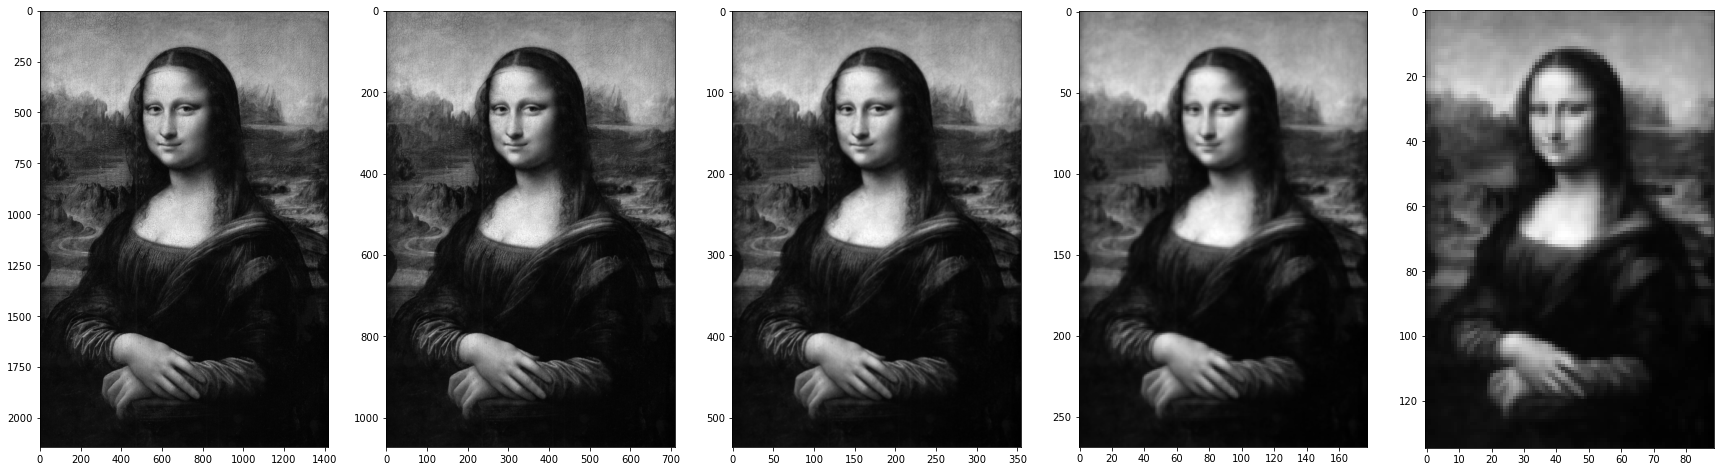

In [6]:
    monaLisa = cv2.imread("mona lisa.jpg"  , cv2.IMREAD_GRAYSCALE)
    gussian_pyramid = gaussian_pyramid(monaLisa,5)

Laplasina Pyramid

Regarding the Laplacian pyramid, it can be said that this pyramid gives us the edges in this way that we put gusin on each image and then subtract the previous image from it and again we get the Gaussian image in the same way and its difference We count and in this way the edges are obtained.

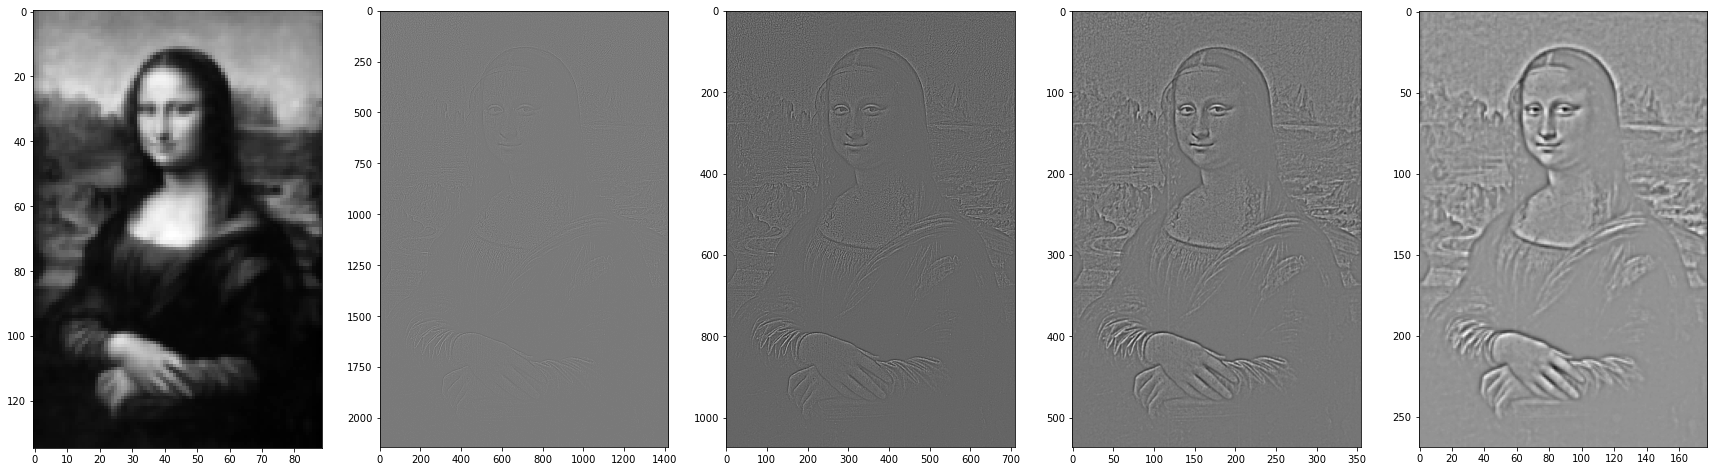

In [7]:
Laplasina(gussian_pyramid)

Problem 5.1.2

The separability property is useful because it allows us to process two-dimensional signals, such as images, using one-dimensional filters. This property enables us to separate the two-dimensional filter into two one-dimensional filters, which can be implemented and processed more efficiently.

Additionally, when applying water feature extraction to an image, processing in different dimensions can result in slower speed. This is due to the larger filter size required in higher-dimensional images, which increases processing time. Conversely, by reducing the size of the filter, we can decrease processing time.

For this scenario, we can employ an algorithm that builds a pyramid of images. In the first step, we apply Gaussian filtering with sigma 𝜎1. In the second step, we decrease the sigma to 𝜎√2. Finally, in the third step, we further decrease the sigma as the image becomes smaller. This reduction in sigma is necessary to match the decreased size of the image and maintain the appropriate filter size.

In [8]:
monaLisa1 = cv2.imread("Lena.bmp"  , cv2.IMREAD_GRAYSCALE)
print(monaLisa1.shape)

(512, 512)


Problem 5.1.3

In [9]:
def Recunstruct(gussian_pyramid):
    laplacian_top = gussian_pyramid[-1]
    num_levels = len(gussian_pyramid) - 1
    laplasina_p = [laplacian_top]
    gussian_p = gussian_pyramid[num_levels]
    plt.figure(figsize=(30,30))
    plt.subplot( 1 ,  num_levels+1 , 1)
    
    for i in range(num_levels,0,-1):
        size = (gussian_pyramid[i - 1].shape[1],gussian_pyramid[i - 1].shape[0])
        gaussian_expanded = cv2.pyrUp(gussian_pyramid[i], dstsize=size)
        laplacian = np.subtract(gussian_pyramid[i-1], gaussian_expanded)
        laplasina_p.append(laplacian)
    for j in range(num_levels , 0  ,-1): 
         
         gaussian_expanded = cv2.pyrUp(gussian_p)
         gussian_p  = np.add(laplasina_p[num_levels-j+1] , gaussian_expanded)
    plt.imshow(gussian_p ,cmap=plt.cm.gray )
    return gussian_p
   

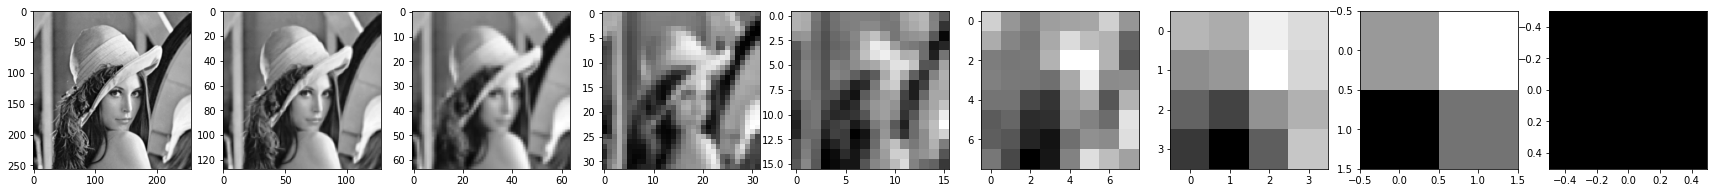

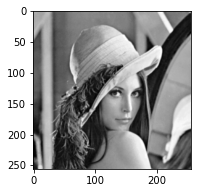

In [10]:
Lena = cv2.imread("Lena.bmp"  , cv2.IMREAD_GRAYSCALE)
pyramid = gaussian_pyramid(Lena,9)
a =Recunstruct(pyramid)




Problem 5.1.4 :

In this section, instead of a Gaussian filter, an average filter is used
We combine 2 by 2 and soften the image with this filter
We will continue the same process as before.
Netabjahorm is approximate as follows:

In [11]:
def box_down_sampeling(imag , level):
    picture = imag.copy()
    plt.figure(figsize=(30,30))
    plt.subplot( 1 , level+1 , 1)
    pyramid = [picture]
    kernel  = np.ones((2 ,2 ) , np.float32) / 4
    for i in range(level) :
        picture = cv2.filter2D(picture ,-1 , kernel)
        picture = picture[::2 , ::2]
        pyramid.append(np.float32(picture))
        plt.subplot(1 , level , i+1)
        plt.imshow(picture , cmap=plt.cm.gray)
    return pyramid

In [12]:
def Laplasina_1(gussian_pyramid):
    laplacian_top = gussian_pyramid[-1]
    num_levels = len(gussian_pyramid) - 1
    
    plt.figure(figsize=(30,30))
    plt.subplot( 1 ,  num_levels+1 , 1)
    plt.imshow(laplacian_top  , cmap=plt.cm.gray)
    for i in range(num_levels,0,-1):
        size = (gussian_pyramid[i - 1].shape[1],gussian_pyramid[i - 1].shape[0])
        gaussian_expanded = cv2.resize(gussian_pyramid[i], size, interpolation = cv2.INTER_NEAREST_EXACT)
        laplacian = np.subtract(gussian_pyramid[i-1], gaussian_expanded)
        plt.subplot( 1 ,  num_levels+1 , i+1)
        plt.imshow(laplacian , cmap=plt.cm.gray )
   

512 256 128 64


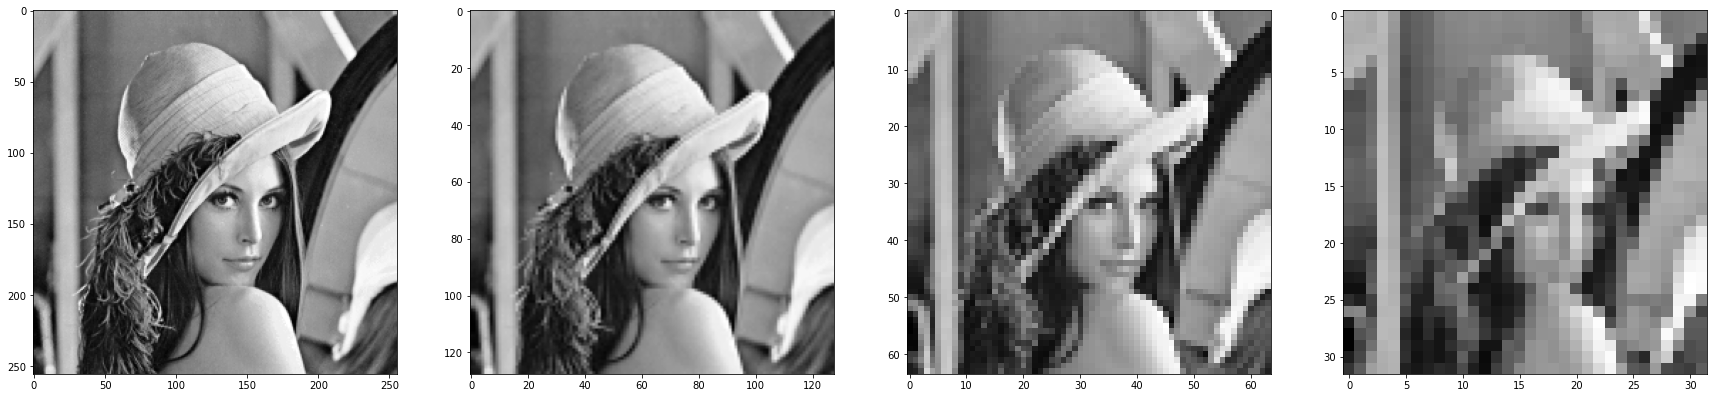

In [13]:
Lena1 = cv2.imread("Lena.bmp"  , cv2.IMREAD_GRAYSCALE)
a = box_down_sampeling(Lena1,4)
print(len(a[0]), len(a[1]) , len(a[2]) , len(a[3]))

The remaining pyramid, which somehow becomes the Laplacian, gives us the edges We draw the following:

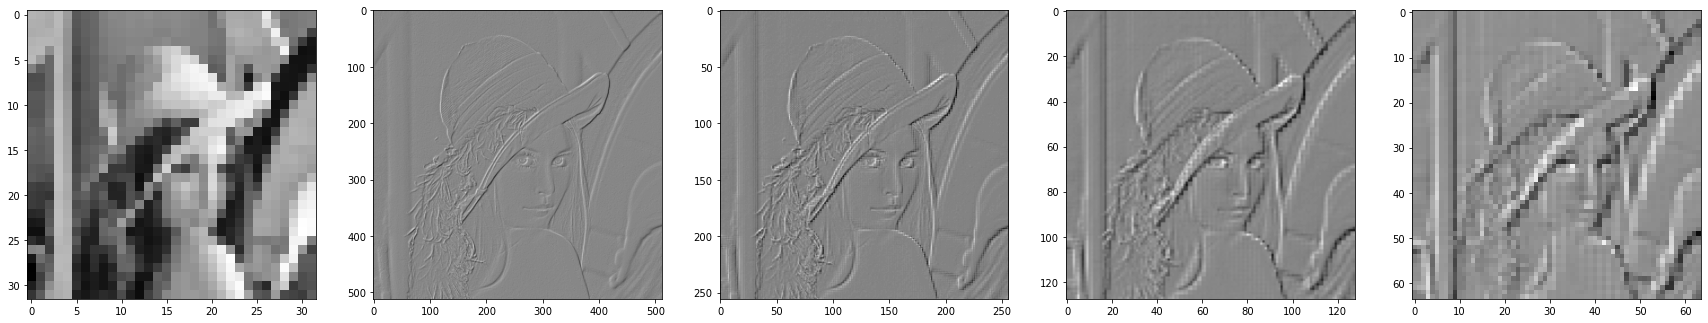

In [14]:
Laplasina_1(a)

Problem 5.1.5 :

In this case, we want to draw the wave pyramid, which in this case we use 3 We use a filter that actually calculates the edges in all directions. One there is also an image called LL, which is actually a soft image It has been passed through the Gaussian filter.As you can see, the obtained image for the same wavelet has a higher quality compared to the pyramid It is made using the mean filter and this is due to the presence of the Gaussian filter To the central houses, which is more important for the pixel, the weight is more than the trimhead Less weight is given to distant pixels.


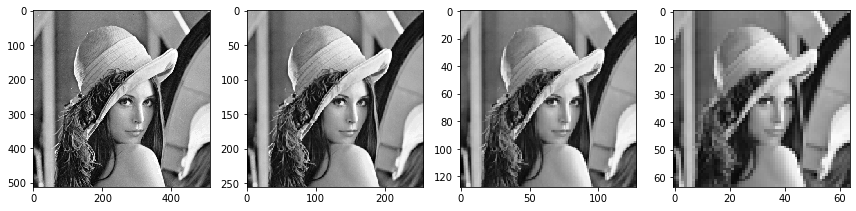

In [30]:
import pywt
Lena2 = cv2.imread("Lena.bmp"  , cv2.IMREAD_GRAYSCALE)
pyramid_wavlet = [Lena2]
LH_arr = []
HL_arr = []
HH_arr = []
LL= Lena2.copy()
for kk in range(0, 3) :
    
    coeffs2 = pywt.dwt2(LL, 'haar' )
    LL, (LH, HL, HH) = coeffs2
    LH_arr.append(LH)
    HL_arr.append(HL)
    HH_arr.append(HH)
    
    
    pyramid_wavlet.append(np.float32(LL))

    
fig = plt.figure(figsize=(12, 3))


ax = fig.add_subplot(1, 4, 1)
ax.imshow(pyramid_wavlet[0], interpolation="nearest", cmap=plt.cm.gray)
ax = fig.add_subplot(1, 4, 2)
ax.imshow(pyramid_wavlet[1], interpolation="nearest", cmap=plt.cm.gray)
ax = fig.add_subplot(1, 4, 3)
ax.imshow(pyramid_wavlet[2], interpolation="nearest", cmap=plt.cm.gray)
ax = fig.add_subplot(1, 4, 4)
ax.imshow(pyramid_wavlet[3], interpolation="nearest", cmap=plt.cm.gray)
fig.tight_layout()
plt.show()

Problem 5.1.6 :

In this part, from the results of the previous part, which includes HL
HH, LH of each level and the last LL we use so that we can LL produce the levels of each level and use the coefficients of the LL level to create the next level Let's produce every
We apply the mentioned formula step on the coefficients.

In [16]:
def coefficientQuantizer(coeff,step):
    coefficient = step * np.sign(coeff) * np.floor(np.abs(coeff)/step)
    return coefficient




In [17]:
def psnr(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return 100
    PIXEL_MAX = 255.0
    return 20 * math.log10(PIXEL_MAX / math.sqrt(mse))

(64, 64)
(64, 64)
(128, 128)
(128, 128)
(256, 256)
(256, 256)
PSNR: 33.407473746088314


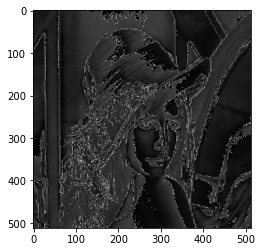

In [43]:
cA  = coefficientQuantizer(pyramid_wavlet[3]  , 2)
for so in range(2 , -1 , -1):
      
    
    # (cH, cV, cD)

    cH = coefficientQuantizer(LH_arr[so],2)
    cV = coefficientQuantizer(HL_arr[so] , 2 )
    cD = coefficientQuantizer(HH_arr[so] , 2 )

    # inverse wavelet transform
    coefficients = [cA, (cH, cV, cD)]
    print(cA.shape)
    print(cH.shape)
    cA= pywt.idwt2(coefficients, 'haar')
    cA= cA.astype('uint8')

plt.imshow(cA , cmap='gray')

Lena3 = cv2.imread("Lena.bmp"  , cv2.IMREAD_GRAYSCALE)
print(f'PSNR: {psnr(Lena3,cA)}')

In [48]:
$ jupyter nbconvert --to pdf Untitled.pdf

SyntaxError: invalid syntax (2225406003.py, line 1)